<a href="https://colab.research.google.com/github/Gus-1003/ISD-invention/blob/main/Plots/2D_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas:

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

%cd /content/drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


In [2]:
import plotly.express as px
import pandas as pd # manipulação e análise de dados
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leitura dos dados:

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/Videos OPTO/Videos_DLC/MTOP10-TEST-E1DLC_resnet50_Videos OPTOSep1shuffle1_182500.csv')
df.head()

,scorer,DLC_resnet50_Videos OPTOSep1shuffle1_182500,DLC_resnet50_Videos OPTOSep1shuffle1_182500.1,DLC_resnet50_Videos OPTOSep1shuffle1_182500.2,DLC_resnet50_Videos OPTOSep1shuffle1_182500.3,DLC_resnet50_Videos OPTOSep1shuffle1_182500.4,DLC_resnet50_Videos OPTOSep1shuffle1_182500.5,DLC_resnet50_Videos OPTOSep1shuffle1_182500.6,DLC_resnet50_Videos OPTOSep1shuffle1_182500.7,DLC_resnet50_Videos OPTOSep1shuffle1_182500.8,DLC_resnet50_Videos OPTOSep1shuffle1_182500.9,DLC_resnet50_Videos OPTOSep1shuffle1_182500.10,DLC_resnet50_Videos OPTOSep1shuffle1_182500.11,DLC_resnet50_Videos OPTOSep1shuffle1_182500.12,DLC_resnet50_Videos OPTOSep1shuffle1_182500.13,DLC_resnet50_Videos OPTOSep1shuffle1_182500.14
0,bodyparts,nose,nose,nose,ear_l,ear_l,ear_l,ear_r,ear_r,ear_r,center,center,center,tail_base,tail_base,tail_base
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,310.13983154296875,102.134033203125,0.9999874830245972,281.1981201171875,92.22260284423828,0.9999496936798096,283.69073486328125,115.04375457763672,0.999889612197876,224.72584533691406,103.58444213867188,0.9998608827590942,204.18807983398438,124.4105224609375,0.9115631580352783
3,1,309.8239440917969,101.36891174316406,0.9999675750732422,281.12725830078125,91.93657684326172,0.9999152421951294,283.7317810058594,114.7477798461914,0.9998282194137573,224.72340393066406,103.5401611328125,0.9998639822006226,203.9853057861328,124.42320251464844,0.9048246145248413
4,2,308.1839599609375,99.10370635986328,0.9999431371688843,280.69439697265625,91.14391326904297,0.9998340606689453,283.73284912109375,113.38082885742188,0.9997654557228088,224.67320251464844,103.69190979003906,0.9998692274093628,203.62205505371094,124.35816192626953,0.918399453163147


# Tratamento dos Dados Brutos

In [4]:
# Para excluir as três primeiras colunas (A, B e C)
df = df.iloc[:, 1:]

# Agora 'df' conterá apenas as colunas D em diante
df.head()

,DLC_resnet50_Videos OPTOSep1shuffle1_182500,DLC_resnet50_Videos OPTOSep1shuffle1_182500.1,DLC_resnet50_Videos OPTOSep1shuffle1_182500.2,DLC_resnet50_Videos OPTOSep1shuffle1_182500.3,DLC_resnet50_Videos OPTOSep1shuffle1_182500.4,DLC_resnet50_Videos OPTOSep1shuffle1_182500.5,DLC_resnet50_Videos OPTOSep1shuffle1_182500.6,DLC_resnet50_Videos OPTOSep1shuffle1_182500.7,DLC_resnet50_Videos OPTOSep1shuffle1_182500.8,DLC_resnet50_Videos OPTOSep1shuffle1_182500.9,DLC_resnet50_Videos OPTOSep1shuffle1_182500.10,DLC_resnet50_Videos OPTOSep1shuffle1_182500.11,DLC_resnet50_Videos OPTOSep1shuffle1_182500.12,DLC_resnet50_Videos OPTOSep1shuffle1_182500.13,DLC_resnet50_Videos OPTOSep1shuffle1_182500.14
0,nose,nose,nose,ear_l,ear_l,ear_l,ear_r,ear_r,ear_r,center,center,center,tail_base,tail_base,tail_base
1,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,310.13983154296875,102.134033203125,0.9999874830245972,281.1981201171875,92.22260284423828,0.9999496936798096,283.69073486328125,115.04375457763672,0.999889612197876,224.72584533691406,103.58444213867188,0.9998608827590942,204.18807983398438,124.4105224609375,0.9115631580352783
3,309.8239440917969,101.36891174316406,0.9999675750732422,281.12725830078125,91.93657684326172,0.9999152421951294,283.7317810058594,114.7477798461914,0.9998282194137573,224.72340393066406,103.5401611328125,0.9998639822006226,203.9853057861328,124.42320251464844,0.9048246145248413
4,308.1839599609375,99.10370635986328,0.9999431371688843,280.69439697265625,91.14391326904297,0.9998340606689453,283.73284912109375,113.38082885742188,0.9997654557228088,224.67320251464844,103.69190979003906,0.9998692274093628,203.62205505371094,124.35816192626953,0.918399453163147


In [5]:
# Concatene as linhas 0 e 1
concatenated_row = df.iloc[0] + "_" + df.iloc[1]
df.iloc[0] = concatenated_row

# Substituir os nomes das colunas pelo conteúdo da primeira linha
df.columns = df.iloc[0]

# Remover a primeira linha (índice 0)
df = df[2:]

# Reset o índice
df.reset_index(drop=True, inplace=True)

# Agora 'df' conterá apenas as colunas D em diante
df.head()

,nose_x,nose_y,nose_likelihood,ear_l_x,ear_l_y,ear_l_likelihood,ear_r_x,ear_r_y,ear_r_likelihood,center_x,center_y,center_likelihood,tail_base_x,tail_base_y,tail_base_likelihood
0,310.13983154296875,102.134033203125,0.9999874830245972,281.1981201171875,92.22260284423828,0.9999496936798096,283.69073486328125,115.04375457763672,0.999889612197876,224.72584533691406,103.58444213867188,0.9998608827590942,204.18807983398438,124.4105224609375,0.9115631580352783
1,309.8239440917969,101.36891174316406,0.9999675750732422,281.12725830078125,91.93657684326172,0.9999152421951294,283.7317810058594,114.7477798461914,0.9998282194137573,224.72340393066406,103.5401611328125,0.9998639822006226,203.9853057861328,124.42320251464844,0.9048246145248413
2,308.1839599609375,99.10370635986328,0.9999431371688843,280.69439697265625,91.14391326904297,0.9998340606689453,283.73284912109375,113.38082885742188,0.9997654557228088,224.67320251464844,103.69190979003906,0.9998692274093628,203.62205505371094,124.35816192626953,0.918399453163147
3,307.7093200683594,96.17938232421875,0.9998074173927307,279.88873291015625,89.20172882080078,0.9998644590377808,286.1210632324219,112.83187866210938,0.9993988275527954,224.40362548828125,103.65623474121094,0.9998370409011841,203.7176055908203,124.47272491455078,0.886262059211731
4,303.8755187988281,95.0369644165039,0.9993896484375,278.8699035644531,87.65206909179688,0.9999176263809204,285.34356689453125,110.68675231933594,0.9991416931152344,223.8165283203125,103.66327667236328,0.9998339414596558,203.82699584960938,124.7862777709961,0.8772501349449158


In [6]:
df.describe()

,nose_x,nose_y,nose_likelihood,ear_l_x,ear_l_y,ear_l_likelihood,ear_r_x,ear_r_y,ear_r_likelihood,center_x,center_y,center_likelihood,tail_base_x,tail_base_y,tail_base_likelihood
count,9982,9982,9982,9982,9982,9982,9982,9982,9982,9982,9982,9982,9982,9982,9982
unique,9968,9974,7204,9967,9975,8237,9975,9975,7963,9971,9966,4715,9968,9963,4172
top,0.0,0.0,0.9999905824661255,0.0,0.0,0.9997240900993347,0.0,0.0,0.9999505281448364,0.0,0.0,0.9999697208404541,0.0,0.0,0.9999971389770508
freq,5,5,15,5,5,6,5,5,8,5,5,13,5,5,73


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nose_x                9982 non-null   object
 1   nose_y                9982 non-null   object
 2   nose_likelihood       9982 non-null   object
 3   ear_l_x               9982 non-null   object
 4   ear_l_y               9982 non-null   object
 5   ear_l_likelihood      9982 non-null   object
 6   ear_r_x               9982 non-null   object
 7   ear_r_y               9982 non-null   object
 8   ear_r_likelihood      9982 non-null   object
 9   center_x              9982 non-null   object
 10  center_y              9982 non-null   object
 11  center_likelihood     9982 non-null   object
 12  tail_base_x           9982 non-null   object
 13  tail_base_y           9982 non-null   object
 14  tail_base_likelihood  9982 non-null   object
dtypes: object(15)
memory usage: 1.1+ MB


# Seleção e conversão de colunas:

In [8]:
# Converta as colunas center_x e center_y para valores numéricos
df['center_x'] = pd.to_numeric(df['center_x'])
df['center_y'] = pd.to_numeric(df['center_y'])

df_teste = df[['center_x', 'center_y']]
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   center_x  9982 non-null   float64
 1   center_y  9982 non-null   float64
dtypes: float64(2)
memory usage: 156.1 KB


<function matplotlib.pyplot.show(close=None, block=None)>

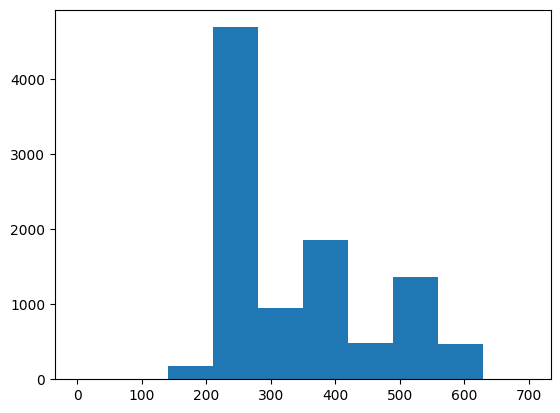

In [9]:
plt.hist(df['center_x'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

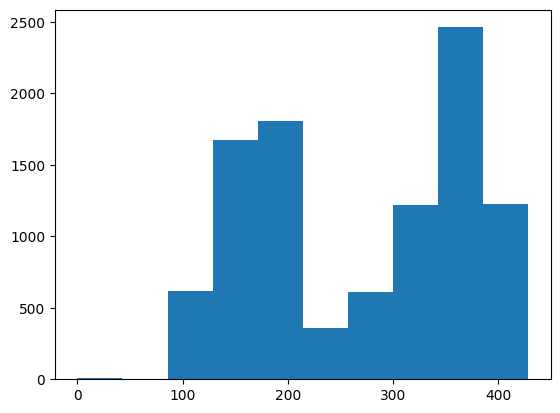

In [10]:
plt.hist(df['center_y'])
plt.show

# Plot do gráfico:

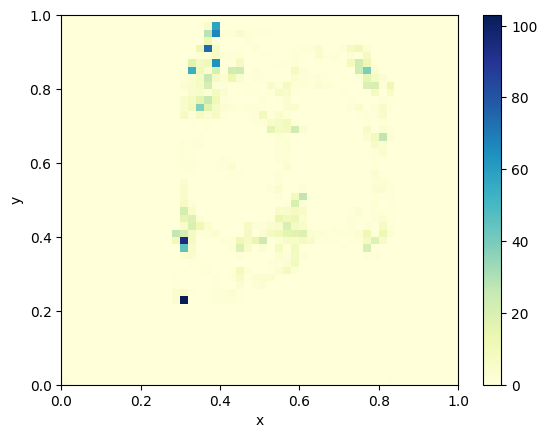

In [11]:
# Normalize as coordenadas para o intervalo [0, 1]
df['center_x'] = (df['center_x'] - df['center_x'].min()) / (df['center_x'].max() - df['center_x'].min())
df['center_y'] = (df['center_y'] - df['center_y'].min()) / (df['center_y'].max() - df['center_y'].min())

# Calcule o histograma 2D com interpolação
x = df['center_x']
y = df['center_y']
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(50, 50), density=True)

# Transponha o heatmap para corrigir a orientação
heatmap = heatmap.T

# Crie um gráfico de calor suavizado 2D
plt.imshow(heatmap, cmap='YlGnBu', extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto', origin='lower')
plt.colorbar()

# Configurar os rótulos dos eixos
plt.xlabel('x')
plt.ylabel('y')

# Exibir o gráfico
plt.show()

<ipython-input-12-b57e08f0e8e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['center_x'] = (df_teste['center_x'] - df_teste['center_x'].min()) / (df_teste['center_x'].max() - df_teste['center_x'].min())
<ipython-input-12-b57e08f0e8e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['center_y'] = (df_teste['center_y'] - df_teste['center_y'].min()) / (df_teste['center_y'].max() - df_teste['center_y'].min())
<ipython-input-12-b57e08f0e8e5>:6: UserWarning: No data for colormapping provide

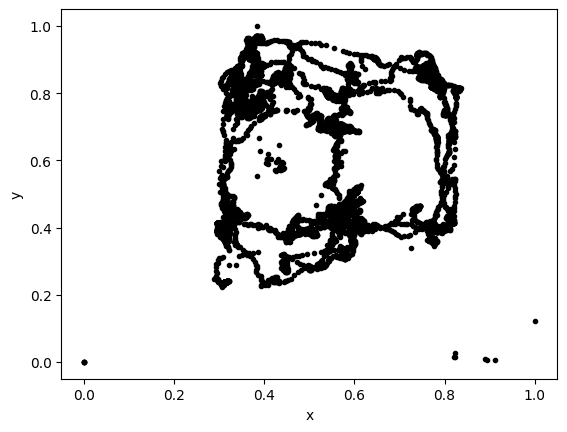

In [12]:
# Normalize as coordenadas para o intervalo [0, 1]
df_teste['center_x'] = (df_teste['center_x'] - df_teste['center_x'].min()) / (df_teste['center_x'].max() - df_teste['center_x'].min())
df_teste['center_y'] = (df_teste['center_y'] - df_teste['center_y'].min()) / (df_teste['center_y'].max() - df_teste['center_y'].min())

# Crie um gráfico de calor 2D
plt.scatter(df_teste['center_x'], df_teste['center_y'], cmap='YlGnBu', marker='.', c='k')

# Configurar os rótulos dos eixos
plt.xlabel('x')
plt.ylabel('y')

# Exibir o gráfico
plt.show()

In [13]:
import plotly.graph_objects as go
from plotly import data

fig = go.Figure(go.Histogram2d(
        x= df_teste['center_x'],
        y= df_teste['center_y'],
        texttemplate= "%{z}"
    ))

# Defina o tamanho do quadro em 700x700 pixels
fig.update_layout(width=1000, height=1000)

fig.show()